In [1]:
import pandas as pd
from pandas import Series
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import accuracy_score



In [2]:
# Функция выводит метрики accuracy и f1-score
def print_logisitc_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f'acc = {acc:.2f} F1-score = {f1:.2f}')

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Познакомимся с данными:

In [4]:
train.info()
print('Размер выборки train:',train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [5]:
test.info()
print('Размер выборки test:',test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

In [6]:
train.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


In [7]:
test.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
0,74835,22MAR2014,GRD,M,29,Y,Y,0,0,-2.271884,3,50,1,2,50000,1,4,N
1,17527,24JAN2014,SCH,F,39,N,N,5,0,-1.504999,2,50,1,2,5000,4,3,N
2,75683,23MAR2014,UGR,M,50,Y,Y,0,0,-1.691339,1,50,1,2,30000,1,3,Y
3,26883,03FEB2014,SCH,M,56,N,N,0,0,-2.374182,1,40,1,2,17000,1,3,N
4,28862,04FEB2014,GRD,F,38,N,N,0,0,-2.487502,0,80,2,3,120000,1,3,N


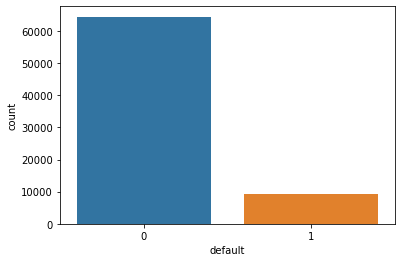

In [8]:
# Посмотрим на рспределение признака default в обучающей выбоке
sns.countplot(train['default'])
# Клиентов, которым выдают кредит намного больше

In [9]:
# Объединим наши датасеты в один для удобства:
train['sample'] = 1 # помечаем где у нас трейн
test['sample'] = 0 # помечаем где у нас тест
test['default'] = 0 # в тесте у нас нет значения default, мы его должны предсказать, по этому пока просто заполняем нулями, чтобы пропуски не мешались



In [10]:
df = test.append(train, sort=False).reset_index(drop=True) #  объединим оба дата сета

In [11]:
df.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,sample,default
0,74835,22MAR2014,GRD,M,29,Y,Y,0,0,-2.271884,3,50,1,2,50000,1,4,N,0,0
1,17527,24JAN2014,SCH,F,39,N,N,5,0,-1.504999,2,50,1,2,5000,4,3,N,0,0
2,75683,23MAR2014,UGR,M,50,Y,Y,0,0,-1.691339,1,50,1,2,30000,1,3,Y,0,0
3,26883,03FEB2014,SCH,M,56,N,N,0,0,-2.374182,1,40,1,2,17000,1,3,N,0,0
4,28862,04FEB2014,GRD,F,38,N,N,0,0,-2.487502,0,80,2,3,120000,1,3,N,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   education         109670 non-null  object 
 3   sex               110148 non-null  object 
 4   age               110148 non-null  int64  
 5   car               110148 non-null  object 
 6   car_type          110148 non-null  object 
 7   decline_app_cnt   110148 non-null  int64  
 8   good_work         110148 non-null  int64  
 9   score_bki         110148 non-null  float64
 10  bki_request_cnt   110148 non-null  int64  
 11  region_rating     110148 non-null  int64  
 12  home_address      110148 non-null  int64  
 13  work_address      110148 non-null  int64  
 14  income            110148 non-null  int64  
 15  sna               110148 non-null  int64  
 16  first_time        11

In [13]:
df.shape

(110148, 20)

Описание данных:
client_id - идентификатор клиента

education - уровень образования

sex - пол заемщика

age - возраст заемщика

car - флаг наличия автомобиля

car_type - флаг автомобиля иномарки

decline_app_cnt - количество отказанных прошлых заявок

good_work - флаг наличия “хорошей” работы

bki_request_cnt - количество запросов в БКИ

home_address - категоризатор домашнего адреса

work_address - категоризатор рабочего адреса

income - доход заемщика

foreign_passport - наличие загранпаспорта

sna - связь заемщика с клиентами банка

first_time - давность наличия информации о заемщике

score_bki - скоринговый балл по данным из БКИ

region_rating - рейтинг региона

app_date - дата подачи заявки

default - флаг дефолта по кредиту

Посмотрим на пропуски в данных:

In [14]:
df.isna().sum()

client_id             0
app_date              0
education           478
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
sample                0
default               0
dtype: int64

Пропуски есть только в одном стобце ['education']. Разберемся с ними:

In [15]:
train['education'].value_counts()

SCH    38860
GRD    23365
UGR     9816
PGR     1257
ACD      194
Name: education, dtype: int64

In [16]:
test['education'].value_counts()

SCH    19138
GRD    11403
UGR     4932
PGR      608
ACD       97
Name: education, dtype: int64

По распределению значений в обучающей и тестовой выборке заполним пропущенные значения самым часто встречающимся 'SCH'

In [17]:
df['education'].fillna('SCH',inplace=True)

In [18]:
df.isna().sum()# Убедимся, что больше незаполненных значений в данных нет

client_id           0
app_date            0
education           0
sex                 0
age                 0
car                 0
car_type            0
decline_app_cnt     0
good_work           0
score_bki           0
bki_request_cnt     0
region_rating       0
home_address        0
work_address        0
income              0
sna                 0
first_time          0
foreign_passport    0
sample              0
default             0
dtype: int64

В данных есть столбец с датой, на ее основе можно сразу сгенерить новый признак, например количество дней с даты подачи заявки и до сегодняшенго дня. Получим сразу чистовой признак ['num_days'],и добавим к данным

In [19]:
today = pd.to_datetime('2021-03-31')

In [20]:
df['app_date'] = pd.to_datetime(df['app_date'])

In [21]:
df['num_days'] = (today - df['app_date']).dt.days

In [22]:
df.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,...,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,sample,default,num_days
0,74835,2014-03-22,GRD,M,29,Y,Y,0,0,-2.271884,...,50,1,2,50000,1,4,N,0,0,2566
1,17527,2014-01-24,SCH,F,39,N,N,5,0,-1.504999,...,50,1,2,5000,4,3,N,0,0,2623
2,75683,2014-03-23,UGR,M,50,Y,Y,0,0,-1.691339,...,50,1,2,30000,1,3,Y,0,0,2565
3,26883,2014-02-03,SCH,M,56,N,N,0,0,-2.374182,...,40,1,2,17000,1,3,N,0,0,2613
4,28862,2014-02-04,GRD,F,38,N,N,0,0,-2.487502,...,80,2,3,120000,1,3,N,0,0,2612


Рассмотрим признаки в данных. Их можно разбить на 3 класса: числовые, бинарные, и категориальные. Сделаем это:

In [23]:
num_cols = ['age','decline_app_cnt','score_bki','bki_request_cnt','income','num_days','region_rating']
bin_cols = ['sex','car','car_type','foreign_passport','good_work']
cat_cols = ['education','home_address','work_address','sna','first_time']

Проверим, чтобы ничего не забыть всего 21 столбец. Для анализа нам не пригодятся 4(sample,app_date,default,client_id)
21-4 = 17

In [24]:
len(num_cols)+len(bin_cols)+len(cat_cols)

17

Визуализация данных:


Посмотрим на распределения числовых столбцов:

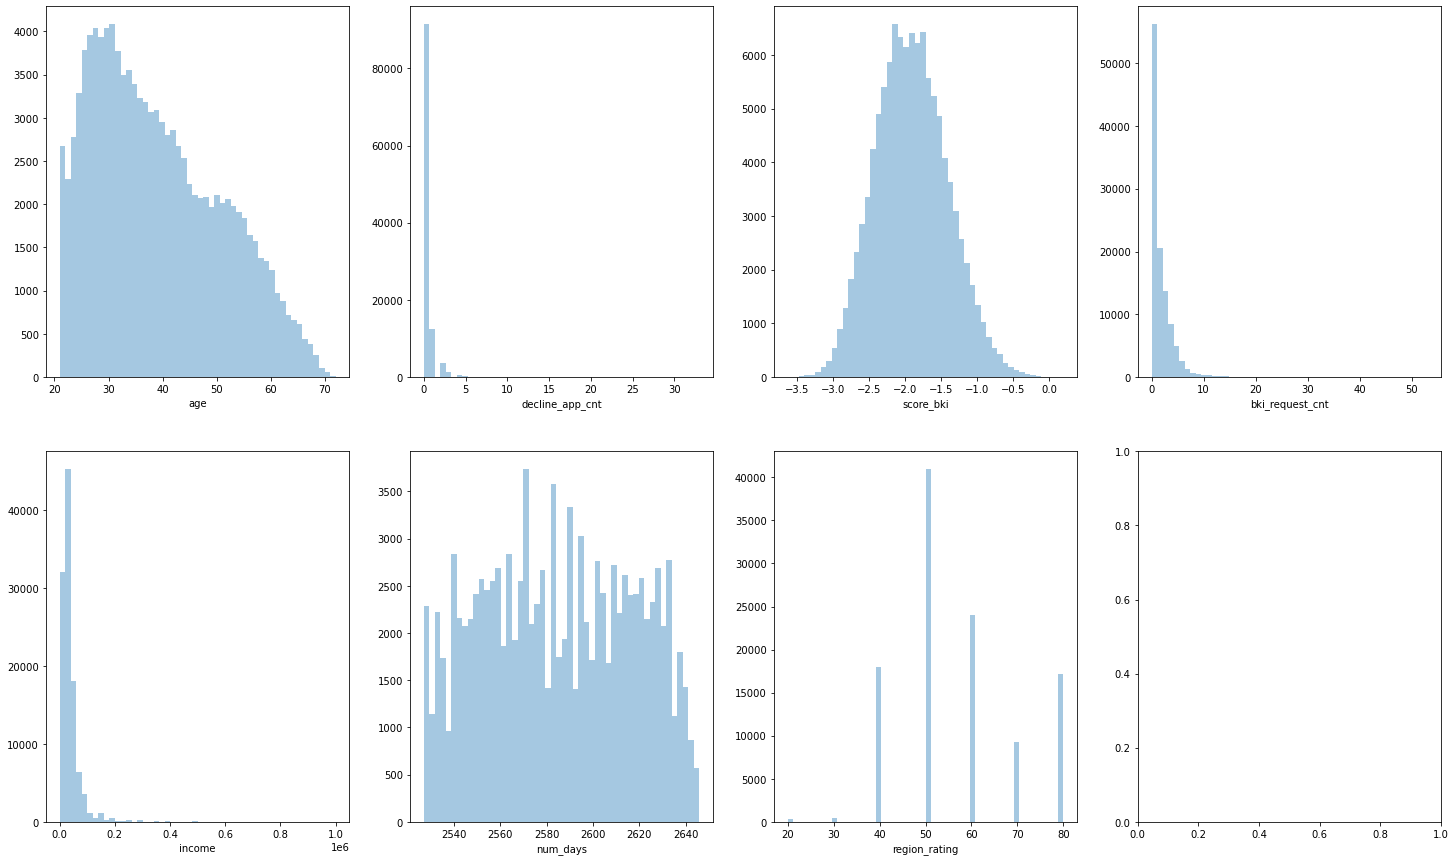

In [25]:
fig, axes = plt.subplots(2,4, figsize=(25,15))

for i,col in enumerate(num_cols):
    sns.distplot(df[col], kde=False, ax=axes.flat[i])

Распределение признаков 'decline_app_cnt', 'bki_request_cnt', 'income' совсем не похоже на нормальное, попробуем улучшить его, порлогарифмировав их:

In [26]:
for i,col in enumerate(['decline_app_cnt', 'bki_request_cnt', 'income']):
    df[col] = np.log(df[col] + 1)

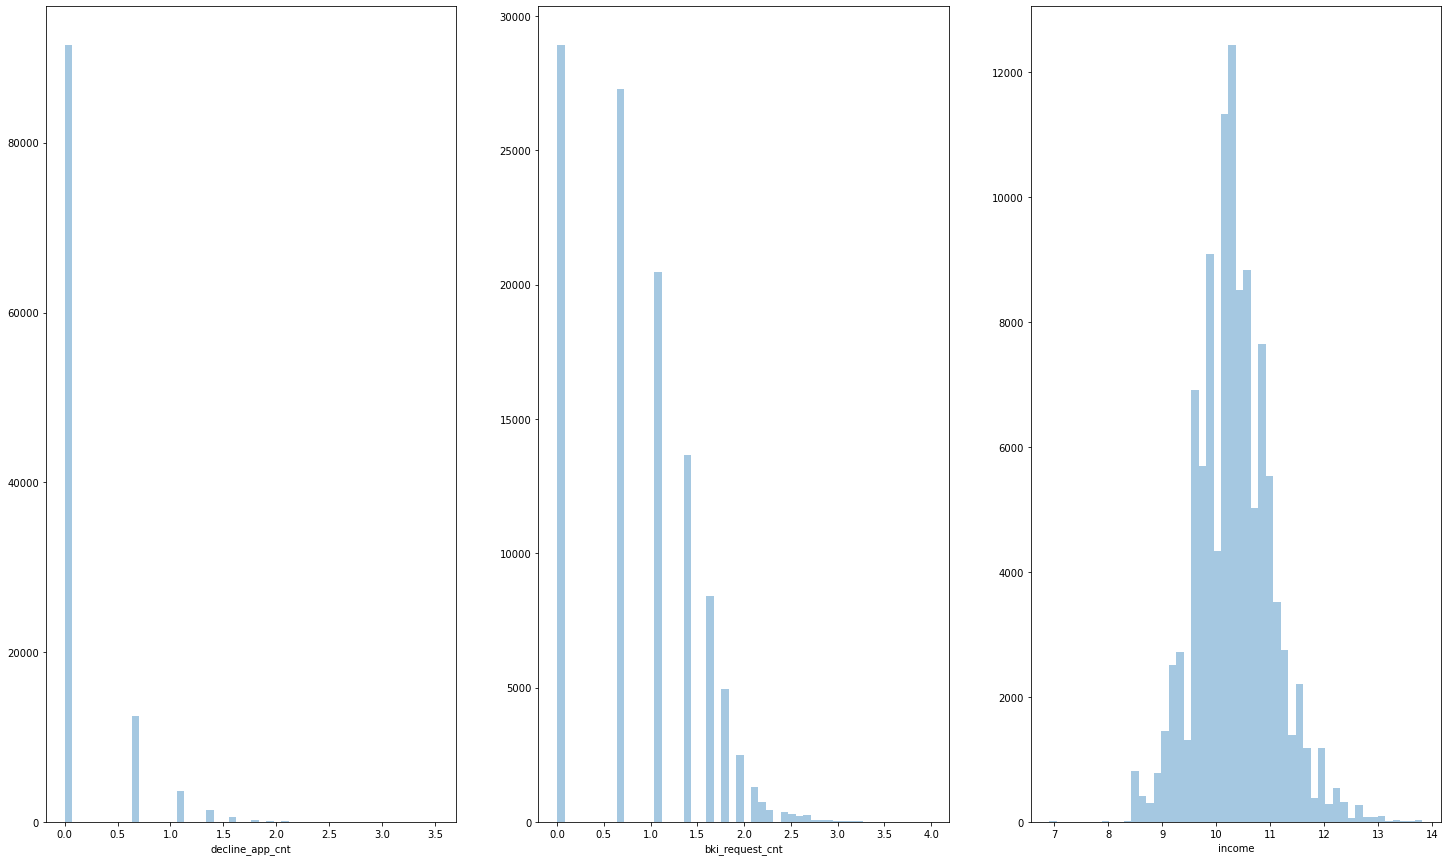

In [27]:
fig, axes = plt.subplots(1,3, figsize=(25,15))

for i,col in enumerate(['decline_app_cnt', 'bki_request_cnt', 'income']):
    sns.distplot(df[col], kde=False, ax=axes.flat[i])

Уже немного лучше.

Посмотрим на выбросы в наших числовых признаках. Построим боксплоты:

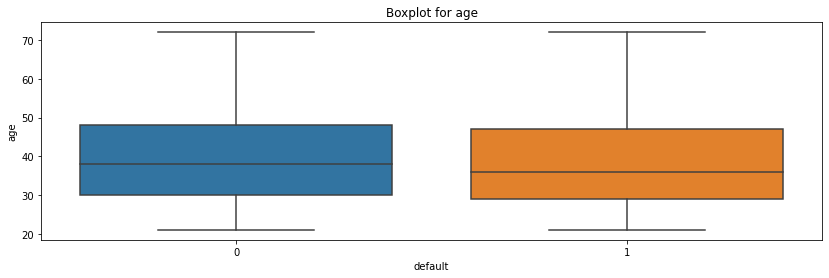

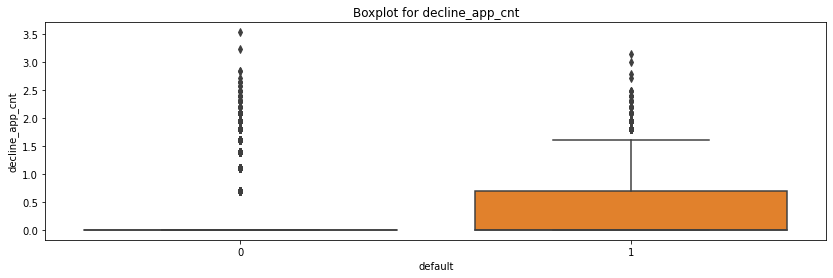

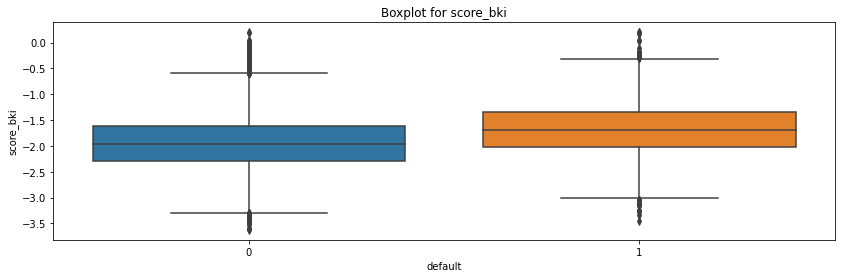

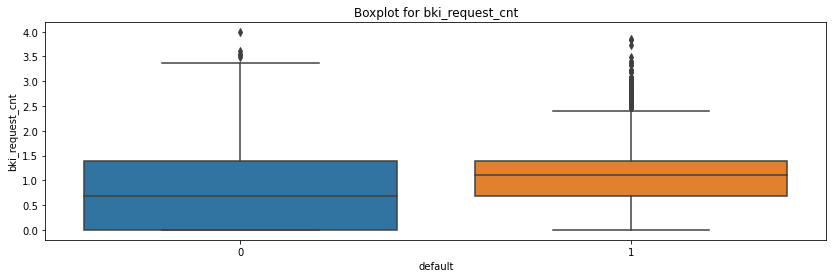

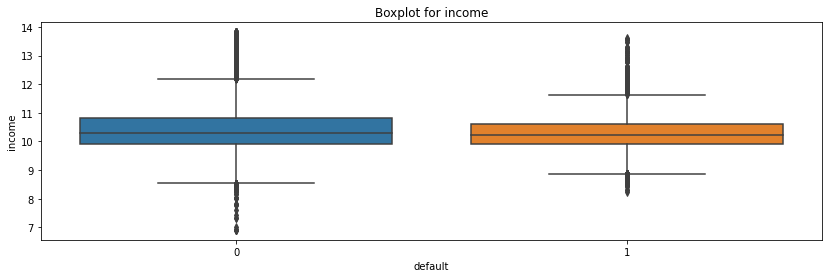

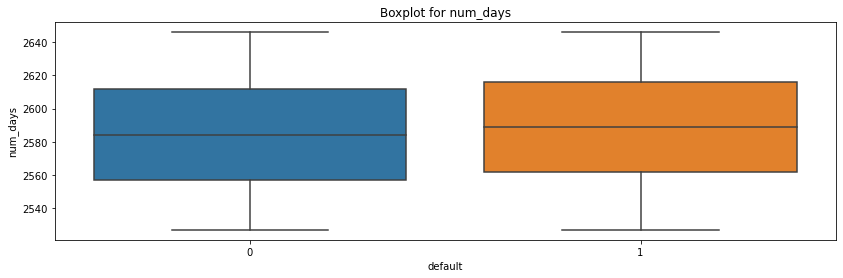

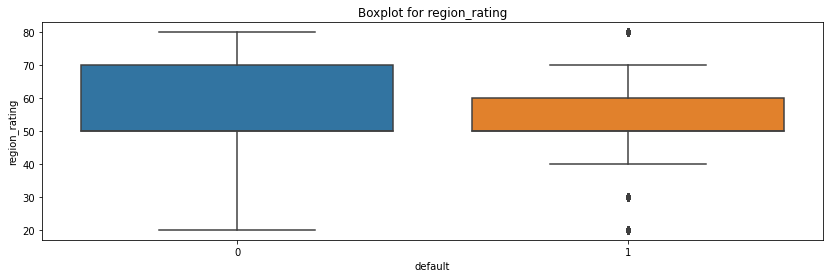

In [28]:
def boxplot(col):
    fig, axes = plt.subplots(figsize = (14, 4))
    sns.boxplot(x='default', y=col, data=df[df['sample']==1],ax=axes)
    axes.set_title('Boxplot for ' + col)
    plt.show()
for col in num_cols:
    boxplot(col)

Можно сделать несколько интересных наблюдений:
1. Дефолтные клиенты несколько моложе.
2. В прошлом у банка было больше дефолтных клиентов, видимо сейчас работает хорошая модель
3. В регионе с плохим рейтингом больше дефолтных клиентов
5. С хорошей зарплатой меньше дефолтных клиентов
6. Больше дефолтных клиентов с большим количеством запросов в БКИ
7. Больше дефольных клиентов с большим количеством отказанных заявок на кредит.

По графикам видно, что в данных есть выбросы. Запомним.

Построим график корреляции для числовых признаков:
По графику видно, что у нас нет сильно коррелирующих признаков, что может плохо повлиять на линейную модел обучения
Из графика корреляции можно заметить, что доход сильно зависит от рейтинга региона проживания, ну или наоборот, если человек хорошо зарабатывает, то он живет в приличном месте.

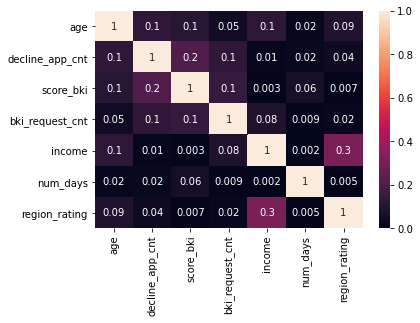

In [29]:
sns.heatmap(df[num_cols].corr().abs(),annot=True,vmin=0,vmax=1,fmt=".1g")

Посмотрим какой признак важнее для нашего таргета:

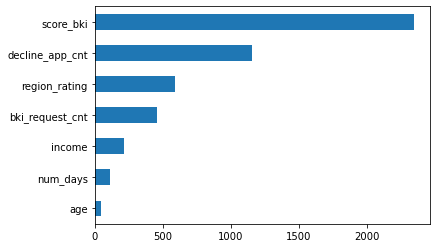

In [30]:
df_temp = df.loc[df['sample'] ==1] 

imp_num = pd.Series(f_classif(df_temp[num_cols], df_temp['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

Признак score_bki является самым важным, а возраст наоборот-самый незначительный.

In [31]:
#df['score_bki_two'] = df['score_bki']**2
#df['new'] = df['score_bki']*df['decline_app_cnt']
# средний доход по возрасту
#mean_income = df.groupby('age')['income'].mean().to_dict()
#f['mean_income_age'] = df['age'].map(mean_income)

In [32]:
# Функция определяет межквартильный интервал и возвращает 1.5 межквартильных расстояния с обеих
# сторон от этого интервала. С её помощью избавимся от выбросов.

def outliers_iqr(ys):
    """Функция определяет межквартильный интервал и возвращает 1.5 межквартильных расстояния с обеих
 сторон от этого интервала. С её помощью избавимся от выбросов."""
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return lower_bound, upper_bound

In [33]:
# убираем выбросы в численных столбцах
num_cols_1 = ['bki_request_cnt', 'score_bki']
for colname in num_cols_1:
    d = outliers_iqr(train[colname])
    train = train.loc[train[colname].between(d[0], d[1])]

Стандартизуем числовые признаки:

In [34]:
df[num_cols] = pd.DataFrame(StandardScaler().fit_transform(df[num_cols]),columns = df[num_cols].columns)

Перейдем к бинарным   и категориальным признакам:
  

Используем LabelEncoder, чтобы перекодировать их из str, в значения 0,1:

In [35]:
label_encoder = LabelEncoder()

for column in bin_cols:
    df[column] = label_encoder.fit_transform(df[column])

In [36]:
df[bin_cols].head()

,sex,car,car_type,foreign_passport,good_work
0,1,1,1,0,0
1,0,0,0,0,0
2,1,1,1,1,0
3,1,0,0,0,0
4,0,0,0,0,0


В категориальных признаках есть один 'education', который тоже нужно перекодировать 
для дальнейшей работы, сделаем это с помощью словаря:

In [37]:
education_nums = {'SCH': 1,'GRD': 2,'UGR': 3,'PGR': 4,'ACD': 5 }
df = df.replace(education_nums)

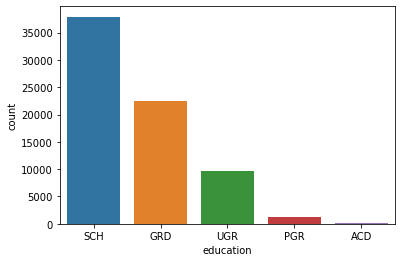

In [38]:
# посмотрим на распределение образования
sns.countplot(train['education'])
# видно, что большая часть заёмщиков имеет образование SCH

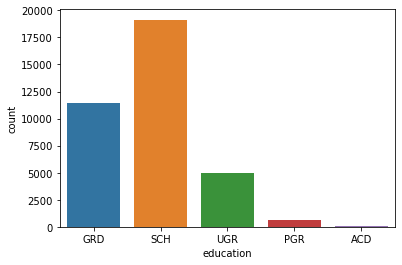

In [39]:
sns.countplot(test['education'])
# видно, что большая часть заёмщиков имеет образование SCH

Определим какие из бинарных и категориальных признаков наиболее важны для модели:

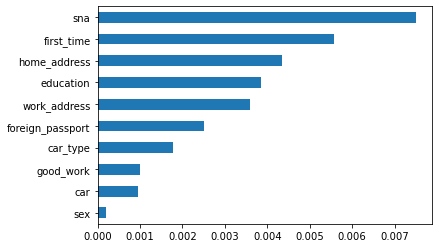

In [40]:
df_temp = df.loc[df['sample'] ==1]  
imp_cat = Series(mutual_info_classif(df_temp[bin_cols + cat_cols], df_temp['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

Наиболее важным является 'sna' связь заемщика с клиентами банка, а наименее важным 'sex'

GET_DUMMIES
Создадим dummy признаки из наших категориальных признаков:

In [41]:
df[cat_cols].head() 

,education,home_address,work_address,sna,first_time
0,2,1,2,1,4
1,1,1,2,4,3
2,3,1,2,1,3
3,1,1,2,1,3
4,2,2,3,1,3


In [42]:
df_dummy = pd.get_dummies(df,prefix=cat_cols, columns=cat_cols)

In [43]:
df_dummy.head()

,client_id,app_date,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,...,work_address_2,work_address_3,sna_1,sna_2,sna_3,sna_4,first_time_1,first_time_2,first_time_3,first_time_4
0,74835,2014-03-22,1,-0.889859,1,1,-0.418815,0,-0.735587,0.770563,...,1,0,1,0,0,0,0,0,0,1
1,17527,2014-01-24,0,-0.021654,0,0,4.539989,0,0.800039,0.333797,...,1,0,0,0,0,1,0,0,1,0
2,75683,2014-03-23,1,0.933372,1,1,-0.418815,0,0.426908,-0.281790,...,1,0,1,0,0,0,0,0,1,0
3,26883,2014-02-03,1,1.454295,0,0,-0.418815,0,-0.940432,-0.281790,...,1,0,1,0,0,0,0,0,1,0
4,28862,2014-02-04,0,-0.108474,0,0,-0.418815,0,-1.167347,-1.334144,...,0,1,1,0,0,0,0,0,1,0


Сформируем данные для модели обучения и выбросим ненужные нам признаки:

In [44]:
train_df = df_dummy.query('sample == 1').drop(['sample','client_id','app_date'],axis=1)
test_df = df_dummy.query('sample == 0').drop(['sample','app_date'],axis=1)

In [45]:
X = train_df.drop(['default'], axis=1).values
y = train_df['default'].values

In [46]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

In [47]:
df.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,...,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,sample,default,num_days
0,74835,2014-03-22,2,1,-0.889859,1,1,-0.418815,0,-0.735587,...,-0.516704,1,2,0.680425,1,4,0,0,0,-0.593234
1,17527,2014-01-24,1,0,-0.021654,0,0,4.539989,0,0.800039,...,-0.516704,1,2,-2.624624,4,3,0,0,0,1.183799
2,75683,2014-03-23,3,1,0.933372,1,1,-0.418815,0,0.426908,...,-0.516704,1,2,-0.052834,1,3,1,0,0,-0.624410
3,26883,2014-02-03,1,1,1.454295,0,0,-0.418815,0,-0.940432,...,-1.282058,1,2,-0.868125,1,3,0,0,0,0.872039
4,28862,2014-02-04,2,0,-0.108474,0,0,-0.418815,0,-1.167347,...,1.779355,2,3,1.937123,1,3,0,0,0,0.840863


In [48]:
# Обучим модель

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

C:\Users\Anna\Skillfactory\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


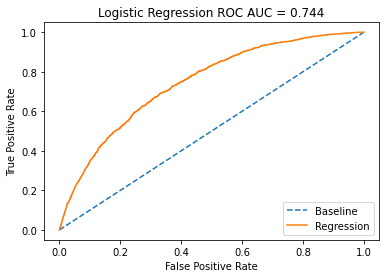

In [49]:
probs = model.predict_proba(X_valid)
probs = probs[:, 1]


fpr, tpr, threshold = roc_curve(y_valid, probs)
roc_auc = roc_auc_score(y_valid, probs)

# Визуализация ROC AUC
plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label='Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [50]:
# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

penalty = ['l1', 'l2']
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression()
model.fit(X_train, y_train)

clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

print('Лучший penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

C:\Users\Anna\Skillfactory\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anna\Skillfactory\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Anna\Skillfactory\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Anna\Skillfactory\lib\site-packages\sklea

C:\Users\Anna\Skillfactory\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Anna\Skillfactory\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Anna\Skillfactory\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Anna\Skillfactory\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Anna\Skillfactory\lib\site-packages\sklearn\model_se

Лучший penalty: l2
Лучшее C: 1.0


C:\Users\Anna\Skillfactory\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
# Обучим модель c регуляризацией

model = LogisticRegression(penalty='l2', C=7.742636826811269, max_iter=800)
model.fit(X_train, y_train)

LogisticRegression(C=7.742636826811269, max_iter=800)

In [52]:
Y_predicted = model.predict(X_valid)
print_logisitc_metrics(y_valid, y_pred)

acc = 0.87 F1-score = 0.04


In [53]:
# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
cm

array([[12872,    61],
       [ 1786,    41]], dtype=int64)

In [54]:
#SUBMISSION
train_df = df.query('sample == 1').drop(['sample','client_id','app_date'],axis=1)
test_df = df.query('sample == 0').drop(['sample','client_id','app_date'],axis=1)

In [55]:
X_train = train_df.drop(['default'], axis=1)
y_train = train_df.default.values
X_test = test_df.drop(['default'], axis=1)

In [56]:
X_train.shape,y_train.shape,X_test.shape

((73799, 17), (73799,), (36349, 17))

In [57]:
model = LogisticRegression(penalty='l2', C=7.742636826811269, max_iter=800)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

In [58]:
submit = pd.DataFrame(test['client_id'])
submit['default'] = y_pred_prob
submit.to_csv('submission.csv', index=False)

In [59]:
display(submit)

,client_id,default
0,74835,0.048588
1,17527,0.363320
2,75683,0.049080
3,26883,0.088780
4,28862,0.030308
...,...,...
36344,83775,0.333336
36345,106254,0.019429
36346,81852,0.357302
36347,1971,0.198799


ВЫВОДЫ: Работа с признаками, очистка, feature engineering, дают больше результатов чем настройка параметров модели, регуляризация и др. Качество модели прежде всго обеспечивается качественными данными.